# Create a DynamoDB table:
1. In AWS, go to the **DynamoDB** module and select **Create table**.
2. Enter a **Table name**.
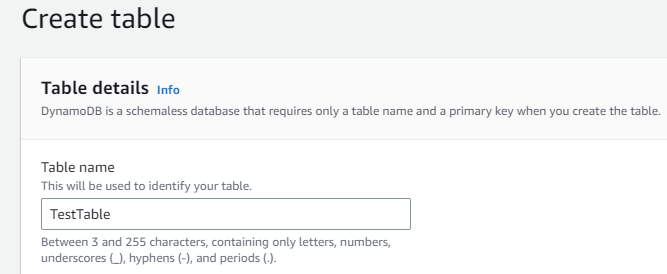
3. You will also need to enter a **Partition Key** which can be any key column from the data that is being processed through the Data Stream. Make sure to also select it's associated data type.
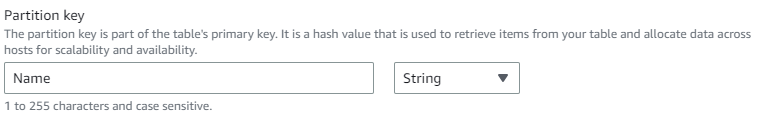
4. Change any other settings that you may need and select **Create table**.

For more details on how to create a DynamoDB, go to [YouTube: Create Amazon DynamoDB Table](https://www.youtube.com/watch?v=dOTUl2mZNVQ)

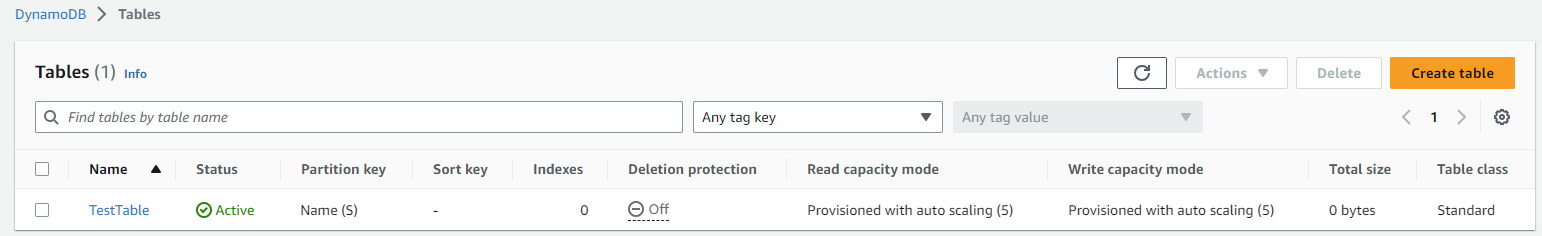

# Create a Lambda function:


In [ ]:
import base64
import json
##python lib for aws
import boto3
import datetime


def lambda_handler(event, context):
    """
    Receive a batch of events from Kinesis and insert into  DynamoDB table
    
    """

    try: 
        ##resource assigned from boto library
        dynamo_db = boto3.resource('dynamodb')
        ##dynamoDB table name
        table = dynamo_db.Table('TestTable')
        
        for record in event["Records"]:
            decoded_data = base64.b64decode(record["kinesis"]["data"]).decode("utf-8")
            print(decoded_data)
            print(json.loads(decoded_data))
            decoded_data_dic = json.loads(decoded_data)
            with table.batch_writer() as batch_writer:
                batch_writer.put_item(Item=decoded_data_dic)
       
    except Exception as e: 
        print(str(e))